<a href="https://colab.research.google.com/github/BigMamaLlama/Running-Data-Science-Project/blob/main/data_science_exploration_AmanPatel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving week_approach_maskedID_timeseries.csv to week_approach_maskedID_timeseries.csv


In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv(io.StringIO(uploaded['week_approach_maskedID_timeseries.csv'].decode('utf-8')))
df = df.drop(['avg training success', 'min training success', 'max training success', 'avg training success.1', 'max training success.1', 'min training success.1'], axis = 1)
df = df.drop(['avg training success.2', 'max training success.2', 'min training success.2', 'avg exertion', 'min exertion', 'max exertion'], axis = 1)
df = df.drop(['avg exertion.1', 'min exertion.1', 'max exertion.1', 'avg exertion.2', 'min exertion.2', 'max exertion.2', 'max km one day'], axis = 1)
df = df.drop(['avg recovery', 'min recovery', 'max recovery', 'avg recovery.1', 'min recovery.1', 'max recovery.1', 'avg recovery.2', 'min recovery.2', 'max recovery.2'], axis = 1)
df = df.drop(['rel total kms week 0_1', 'rel total kms week 0_2', 'rel total kms week 1_2'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 4   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 5   nr. days with interval session                 42798 non-null  float64
 6   total km Z3-4                                  42798 non-null  float64
 7   max km Z3-4 one day                            42798 non-null  float64
 8   total km Z5-T1-T2                              42798 non-null  float64
 9   max km Z5-T1-T2 one day                        427

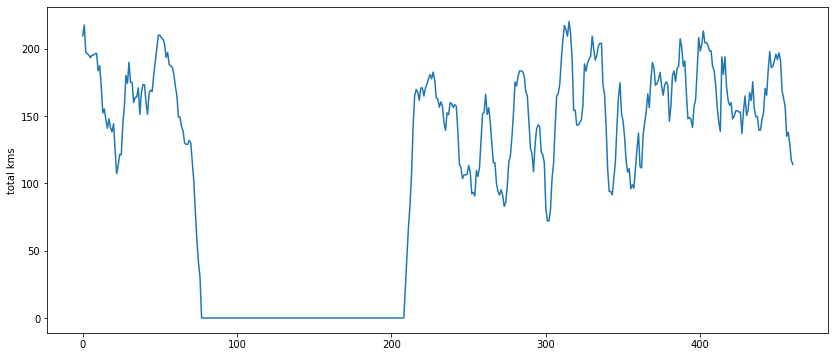

In [3]:
def indexIndividualData(id):
  df0 = df[df['Athlete ID'] == id]
  index1 = df0.index[0]
  indexLast = df0.index[-1]
  y = indexLast - len(df0[df0['injury']==0]) - len(df0[df0['injury']==1])
  df0 = df0.rename(index = lambda x: x - y - 1 if x > indexLast - len(df0[df0['injury']==1]) else x - index1)
  df0 = df0.sort_values(by = 'Date')
  return df0
def plotIndividualData(id, column):
  df0 = indexIndividualData(id)
  plt.figure(figsize = (14,6))
  sns.lineplot(data=df0[column])
plotIndividualData(1, 'total kms')

In [4]:
#SVM classifier using undersampling
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[5933 4623]
 [  54   90]]


In [5]:
#SVM Classifier using oversampling
from imblearn.over_sampling import SMOTE
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[10018   538]
 [  125    19]]


In [6]:
#Bagging Classifier With Undersampling
import sklearn.ensemble
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
bag = sklearn.ensemble.BaggingClassifier(n_estimators = 30)
bag.fit(X_train, Y_train)
Y_pred = bag.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))


[[6238 4318]
 [  53   91]]


In [7]:
#Bagging Classifier With Oversampling
import sklearn.ensemble
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
bag = sklearn.ensemble.BaggingClassifier(n_estimators = 30)
bag.fit(X_train, Y_train)
Y_pred = bag.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[10545    11]
 [  144     0]]


In [16]:
#XGBooster model with Undersampling
from xgboost import XGBClassifier
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)
boost = XGBClassifier(max_depth = 3, n_estimators = 30)
boost.fit(X_train, Y_train)
Y_pred = boost.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[5700 4856]
 [  33  111]]


In [19]:
#XGBooster model with Oversampling
from xgboost import XGBClassifier
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)
boost = XGBClassifier(max_depth = 2, n_estimators = 30)
boost.fit(X_train, Y_train)
Y_pred = boost.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[10002   554]
 [  129    15]]
